# __Analysis of economic impact on various aspects of life__

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
import random

%matplotlib notebook

In [2]:
import io

## __Data preprocessing__

In [3]:
# for colab users

# from google.colab import files
# uploaded = files.upload()

In [3]:
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df = pd.read_csv('data_extended.csv')

# replace in column names all '.' to '_', it would simplify using pandas data frames
df.columns = df.columns.str.replace('.', '_')

In [4]:
df

,country_code,year,BN_KLT_DINV_CD,BX_KLT_DINV_WD_GD_ZS,BX_KLT_DINV_CD_WD,BM_KLT_DINV_GD_ZS,BN_TRF_KOGT_CD,BN_FIN_TOTL_CD,BX_KLT_DREM_CD_DT,BN_RES_INCL_CD,...,SL_TLF_TERT_ZS,SM_POP_TOTL_ZS,SL_UEM_LTRM_ZS,SL_UEM_PRIM_ZS,SL_UEM_SECO_ZS,SL_UEM_TERT_ZS,SL_UEM_TOTL_NE_ZS,country,life_expectancy,gdp
0,BEL,2014,1.374422e+10,-3.780938,-2.009745e+10,4.921025,-5.307206e+08,5.648971e+09,NaN,NaN,...,41.5,NaN,49.900002,37.099998,40.200001,22.700001,8.500000,Belgium,89.0,47439.396840
1,BLR,2000,NaN,0.932726,1.188000e+08,NaN,NaN,NaN,4.600000e+06,NaN,...,NaN,11.230245,NaN,7.500000,14.600000,77.900002,NaN,Belarus,68.0,1276.288340
2,BRB,2006,-2.977965e+08,7.952698,3.422444e+08,1.032832,NaN,-2.235248e+08,NaN,-2.484290e+07,...,NaN,NaN,14.000000,NaN,NaN,NaN,8.700000,Barbados,74.1,15646.559100
3,CRI,2003,NaN,3.282795,5.750649e+08,NaN,NaN,NaN,6.435034e+08,NaN,...,15.5,NaN,NaN,68.300003,19.299999,9.100000,6.600000,Costa Rica,78.0,4167.714170
4,DEU,2003,NaN,1.234528,3.093398e+10,NaN,NaN,NaN,NaN,NaN,...,23.6,NaN,49.299999,26.000000,57.799999,12.000000,9.800000,Germany,78.5,3359.952150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,PRY,2001,NaN,1.098844,8.420000e+07,NaN,NaN,NaN,8.855000e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,Paraguay,71.2,1417.265820
2546,SLV,2010,2.255654e+08,-0.528336,-1.131607e+08,0.524807,2.320159e+08,-2.638895e+08,1.904872e+08,-2.974201e+08,...,11.1,0.667803,NaN,47.700001,31.700001,9.800000,7.000000,El Salvador,72.0,3474.392445
2547,TJK,2012,-1.982802e+08,2.597658,1.982802e+08,NaN,7.110520e+07,-8.098279e+07,3.303590e+07,7.516138e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tajikistan,68.8,954.725253
2548,UKR,2008,-9.903000e+09,5.944695,1.070000e+10,0.442796,2.800000e+07,-1.222700e+10,2.506000e+09,-3.025220e+09,...,NaN,NaN,NaN,7.400000,52.900002,39.700001,6.400000,Ukraine,67.7,3891.378230


In [6]:
countries = df["country_code"].unique()

for co in countries:
    df.loc[df.country_code == co] =  df[df.country_code == co].interpolate(method='linear',
                                                               limit_direction = "both")
df = df.fillna(value=0)
df

,country_code,year,BN_KLT_DINV_CD,BX_KLT_DINV_WD_GD_ZS,BX_KLT_DINV_CD_WD,BM_KLT_DINV_GD_ZS,BN_TRF_KOGT_CD,BN_FIN_TOTL_CD,BX_KLT_DREM_CD_DT,BN_RES_INCL_CD,...,SL_TLF_TERT_ZS,SM_POP_TOTL_ZS,SL_UEM_LTRM_ZS,SL_UEM_PRIM_ZS,SL_UEM_SECO_ZS,SL_UEM_TERT_ZS,SL_UEM_TOTL_NE_ZS,country,life_expectancy,gdp
0,BEL,2014,1.374422e+10,-3.780938,-2.009745e+10,4.921025,-5.307206e+08,5.648971e+09,0.000000e+00,6.968027e+09,...,41.500000,8.574740,49.900002,37.099998,40.200001,22.700001,8.500000,Belgium,89.0,47439.396840
1,BLR,2000,-3.876900e+09,0.932726,1.188000e+08,0.210096,4.100000e+06,-4.014000e+09,4.600000e+06,1.550469e+09,...,24.299999,11.230245,5.800000,7.500000,14.600000,77.900002,0.700000,Belarus,68.0,1276.288340
2,BRB,2006,-2.977965e+08,7.952698,3.422444e+08,1.032832,0.000000e+00,-2.235248e+08,0.000000e+00,-2.484290e+07,...,18.400000,9.573998,14.000000,13.100000,71.900002,8.700000,8.700000,Barbados,74.1,15646.559100
3,CRI,2003,-2.072325e+09,3.282795,5.750649e+08,0.019819,7.418910e+06,-2.827538e+09,6.435034e+08,-3.059461e+08,...,15.500000,7.921283,15.900000,68.300003,19.299999,9.100000,6.600000,Costa Rica,78.0,4167.714170
4,DEU,2003,8.982427e+10,1.234528,3.093398e+10,4.089300,-2.316051e+09,2.533880e+11,0.000000e+00,1.233860e+09,...,23.600000,13.155374,49.299999,26.000000,57.799999,12.000000,9.800000,Germany,78.5,3359.952150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,PRY,2001,-4.795000e+08,1.098844,8.420000e+07,0.073951,5.100000e+07,-4.916166e+08,8.855000e+07,-2.407089e+07,...,18.400000,2.902600,21.200001,44.299999,34.900002,19.600000,7.600000,Paraguay,71.2,1417.265820
2546,SLV,2010,2.255654e+08,-0.528336,-1.131607e+08,0.524807,2.320159e+08,-2.638895e+08,1.904872e+08,-2.974201e+08,...,11.100000,0.667803,0.000000,47.700001,31.700001,9.800000,7.000000,El Salvador,72.0,3474.392445
2547,TJK,2012,-1.982802e+08,2.597658,1.982802e+08,-1.868887,7.110520e+07,-8.098279e+07,3.303590e+07,7.516138e+07,...,10.900000,4.502623,34.200001,21.000000,73.699997,5.400000,11.500000,Tajikistan,68.8,954.725253
2548,UKR,2008,-9.903000e+09,5.944695,1.070000e+10,0.442796,2.800000e+07,-1.222700e+10,2.506000e+09,-3.025220e+09,...,45.799999,11.239434,14.000000,7.400000,52.900002,39.700001,6.400000,Ukraine,67.7,3891.378230


In [7]:
# for colab users

# from google.colab import files
# uploaded = files.upload()

In [8]:
# series file constains full names of used indicators
data_path = 'series_extended.txt'

indicators_full_names = []
with open(data_path, 'rb') as f:
  lines = f.read().decode().split('\n')
  for line in lines:
    if line:
      indicators_full_names.append(line)

indicators_full_names.insert(0, 'Country Code')
indicators_full_names.insert(1, 'Year')
indicators_full_names.append('Country Name')
indicators_full_names.append('Life Expectancy')
indicators_full_names.append('GDP')

## __Helpers__

In [9]:
indicators_names_and_symbols = dict()
for it, column in enumerate(df.columns):
  indicators_names_and_symbols[column] = indicators_full_names[it]


def translate_symbol_to_name(column_name):
    """
    Convert indicator symbol to full name
    :param str culmn_name:
    :return str: 
    """
    result = indicators_names_and_symbols.get(column_name)
    return result

In [10]:
translate_symbol_to_name('SP_DYN_IMRT_IN')

'Mortality rate, infant (per 1,000 live births)'

In [10]:
def print_sorted_dict(dictionary, add_indices=False):
    """
    Print dictionary sorted by its values.
    Mainly for debug purposes
    :param str dictionary: dictionary to print
    :param bool add_indices: 
    :return:
    """
    for i,k in enumerate(dictionary, key=dictionary.get, reverse=True):
        if (add_indices):
            print(i + 1, k, dictionary[k])
        else:
            print(k, dictionary[k])

In [11]:
def mean_dict_generator(key):
    """
    Generate dictionary of mean values
    :param str key: indicator symbol
    :return dict: generated dictionary
    """
    # TODO check if value even exist in columns
    result = {}
    for country in df.country.unique():
        # some slices could contain only one NAN
        # we do not insert this record into result array
        # and we get rid of annoying RT errors
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            mean = np.nanmean(df[df.country == country][key])
            if (mean == mean):
                result[country] = int(round(mean, 1))
    return result      
    

## __Histograms__

<IPython.core.display.Javascript object>


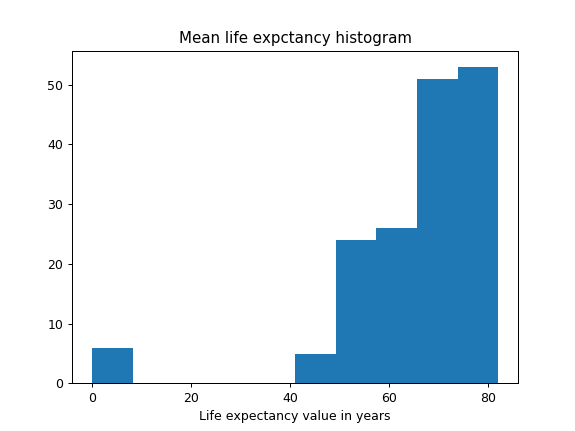

In [12]:
mean_life_expect = mean_dict_generator('life_expectancy')

plt.hist(mean_life_expect.values(), bins=10)
plt.title("Mean life expctancy histogram")
plt.xlabel('Life expectancy value in years')
plt.show()

In [479]:
df[df['country_code'] == 'AFG']

,country_code,year,BN_KLT_DINV_CD,BX_KLT_DINV_WD_GD_ZS,BX_KLT_DINV_CD_WD,BM_KLT_DINV_GD_ZS,BN_TRF_KOGT_CD,BN_FIN_TOTL_CD,BX_KLT_DREM_CD_DT,BN_RES_INCL_CD,...,SL_TLF_TERT_ZS,SM_POP_TOTL_ZS,SL_UEM_LTRM_ZS,SL_UEM_PRIM_ZS,SL_UEM_SECO_ZS,SL_UEM_TERT_ZS,SL_UEM_TOTL_NE_ZS,country,life_expectancy,gdp
291,AFG,2009,-213670260.0,1.581754,1.975127e+08,NaN,5.225125e+08,1.154799e+09,1.179647e+05,510139975.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,58.6,445.893298
413,AFG,2002,NaN,1.211000,5.000000e+07,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,56.2,187.845950
776,AFG,2001,NaN,0.027624,6.800000e+05,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,55.3,117.496980
878,AFG,2006,NaN,3.372252,2.380000e+08,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,57.3,272.563770
917,AFG,2007,NaN,1.916833,1.886900e+08,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,57.5,369.835796
1190,AFG,2010,-75649209.0,0.340097,5.420055e+07,NaN,5.825151e+08,1.387112e+09,3.758090e+05,552947598.6,...,NaN,0.325021,NaN,NaN,NaN,NaN,NaN,Afghanistan,58.8,553.328940
1312,AFG,2011,-91227567.0,0.321361,5.762084e+07,NaN,3.175499e+08,9.741949e+08,8.277915e+04,592215527.7,...,NaN,NaN,NaN,NaN,NaN,NaN,8.2,Afghanistan,59.2,63.537231
1416,AFG,2004,NaN,3.536115,1.869000e+08,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,57.0,219.141353
1564,AFG,2005,NaN,4.318673,2.710000e+08,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,0.354308,NaN,NaN,NaN,NaN,8.5,Afghanistan,57.3,25.294130
1672,AFG,2003,NaN,1.261004,5.780000e+07,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,56.7,198.728544


<IPython.core.display.Javascript object>


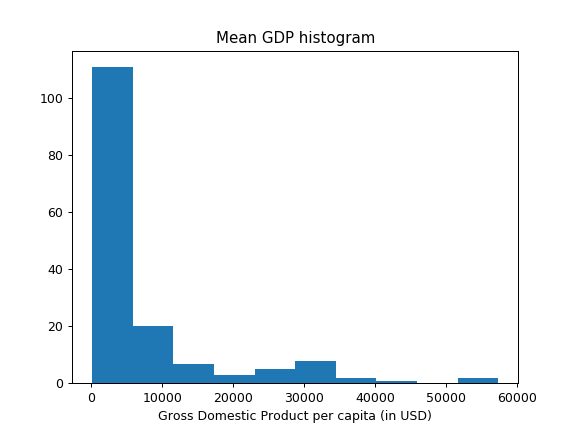

In [480]:
# TODO skip nan values

mean_gdp = mean_dict_generator('gdp')

plt.hist(mean_gdp.values(), bins=10)
plt.title("Mean GDP histogram")
plt.xlabel("Gross Domestic Product per capita (in USD)")
plt.show()

<IPython.core.display.Javascript object>


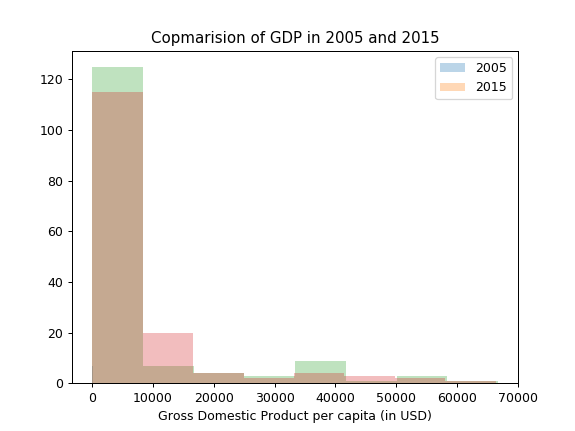

In [481]:
years = ['2005', '2015']
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)

X_05 = np.array(df[df['year'] == 2005]['life_expectancy'])
X_15 = np.array(df[df['year'] == 2015]['life_expectancy'])

X_05 = X_05[~np.isnan(X_05)]
X_15 = X_15[~np.isnan(X_15)]

plt.hist(X_05, **kwargs)
plt.hist(X_15, **kwargs)
plt.legend(years)
plt.title("Copmarision of life expectancy in 2005 and 2015")
plt.xlabel('Life expectancy value in years')
plt.show()

<IPython.core.display.Javascript object>


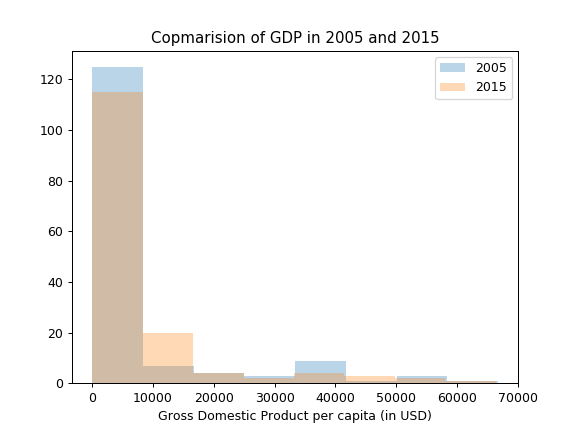

In [483]:
# TODO clean NANs
years = ['2005', '2015']
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=8)

X_05 = np.array(df[df['year'] == 2005]['gdp'])
X_15 = np.array(df[df['year'] == 2015]['gdp'])

# skip NANs
X_05 = X_05[~np.isnan(X_05)]
X_15 = X_15[~np.isnan(X_15)]

plt.hist(X_05, **kwargs)
plt.hist(X_15, **kwargs)

plt.legend(years)
plt.title("Copmarision of GDP in 2005 and 2015")
plt.xlabel("Gross Domestic Product per capita (in USD)")
plt.show()

## __PCA analysis__

In [445]:
year = 2010
data_from_year = df[df['year'] == year]
countries = list(data_from_year['country_code'])

# data contatins only columns with indicators
data = data_from_year.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [446]:
# replace NaN with mean values
# in data there should not be any NaN values...
data.fillna(data.mean(), inplace=True)

In [447]:
data

,BN_KLT_DINV_CD,BX_KLT_DINV_WD_GD_ZS,BX_KLT_DINV_CD_WD,BM_KLT_DINV_GD_ZS,BN_TRF_KOGT_CD,BN_FIN_TOTL_CD,BX_KLT_DREM_CD_DT,BN_RES_INCL_CD,BN_CAB_XOKA_GD_ZS,BN_GSR_GNFS_CD,...,SL_TLF_SECO_ZS,SL_TLF_TERT_ZS,SM_POP_TOTL_ZS,SL_UEM_LTRM_ZS,SL_UEM_PRIM_ZS,SL_UEM_SECO_ZS,SL_UEM_TERT_ZS,SL_UEM_TOTL_NE_ZS,life_expectancy,gdp
29,-1.463800e+09,13.300068,2.592803e+09,3.021907,6.743472e+08,1.137005e+09,0.000000e+00,-1.111781e+09,2.005158,1.268320e+09,...,54.799999,35.500000,13.703900,45.299999,17.200001,62.500000,19.9,16.700001,75.6,14638.648200
72,1.782715e+08,0.605800,1.557710e+08,1.299106,5.000000e+07,9.270440e+08,0.000000e+00,1.279545e+09,2.994842,4.784840e+09,...,31.200001,9.800000,25.005807,28.799999,13.700000,62.299999,20.9,1.100000,76.1,2722.138900
98,-2.093173e+10,17.159354,3.776364e+10,7.648223,-8.272181e+08,-8.392037e+09,0.000000e+00,-4.175198e+07,1.053584,3.846233e+10,...,38.299999,38.900002,19.706128,48.700001,29.500000,44.700001,22.0,13.900000,86.0,48538.587760
124,-7.256291e+06,2.428885,8.982407e+06,0.398314,3.698737e+07,-8.506971e+07,0.000000e+00,-3.549999e+07,-21.391823,-1.682949e+08,...,0.000000,0.000000,0.815800,0.000000,68.099998,28.900000,0.9,1.100000,72.8,3547.599750
126,-6.264493e+09,7.228707,1.572520e+10,4.348987,6.240472e+09,8.966452e+09,0.000000e+00,3.023069e+09,1.646255,1.385660e+10,...,57.000000,19.700001,1.883021,0.000000,22.700001,54.900002,21.6,8.100000,79.1,1286.177640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,0.000000e+00,16.400074,3.632300e+09,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.119401,0.000000,0.000000,0.000000,0.0,0.000000,65.8,4439.230000
2503,-1.743127e+08,1.391643,3.044196e+07,0.153379,1.556790e+08,-1.804557e+08,3.178067e+08,-2.093714e+08,-18.507200,-1.490212e+09,...,0.000000,0.000000,0.314734,61.700001,57.200001,33.500000,0.4,25.187499,51.1,1173.262120
2507,-3.650103e+07,3.234153,3.650103e+07,0.000000,5.531704e+07,-1.745995e+07,6.797171e+06,-6.712712e+06,4.473571,-7.215805e+07,...,0.000000,0.000000,13.739375,0.000000,0.000000,0.000000,0.0,59.500000,61.3,1325.997240
2542,-3.509203e+08,11.358888,3.567269e+08,0.184891,2.921775e+06,-1.535151e+08,1.434097e+08,1.382899e+08,-4.516244,-1.899623e+08,...,0.000000,0.000000,2.155120,55.599998,51.599998,33.799999,13.4,8.900000,69.1,3651.966784


In [448]:
# standarize data
# have no idea why it warn about NaN values if data do not have any NaN...
data_scaled = preprocessing.scale(data)

/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [449]:
data_scaled.shape

(159, 198)

In [450]:
columns_to_delete = []
for i, entry in enumerate(data_scaled.std(axis=0)):
    if np.isnan(entry):
        columns_to_delete.append(i)
columns_to_delete

[]

In [451]:
# delete this columns which are NaN
data_scaled = np.delete(data_scaled, columns_to_delete, axis=1)
data_scaled.shape

(159, 198)

In [452]:
indicators = list(data.columns)

for index in columns_to_delete:
    del indicators[index]

# it should be correct
len(indicators)

198

In [453]:
# if this failes, something is wrong or above cells were run too many times
assert len(indicators) == data_scaled.shape[1]

In [454]:
from sklearn.decomposition import PCA

In [455]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)
X_pca.shape

(159, 159)

In [456]:
sample_indicators = np.random.choice(indicators, 5, replace=False)
print(sample_indicators)

['EN_POP_EL5M_ZS' 'EN_ATM_PM25_MC_M3' 'SE_PRM_AGES' 'SL_UEM_LTRM_ZS'
 'DT_DSF_DPPG_CD']


<IPython.core.display.Javascript object>


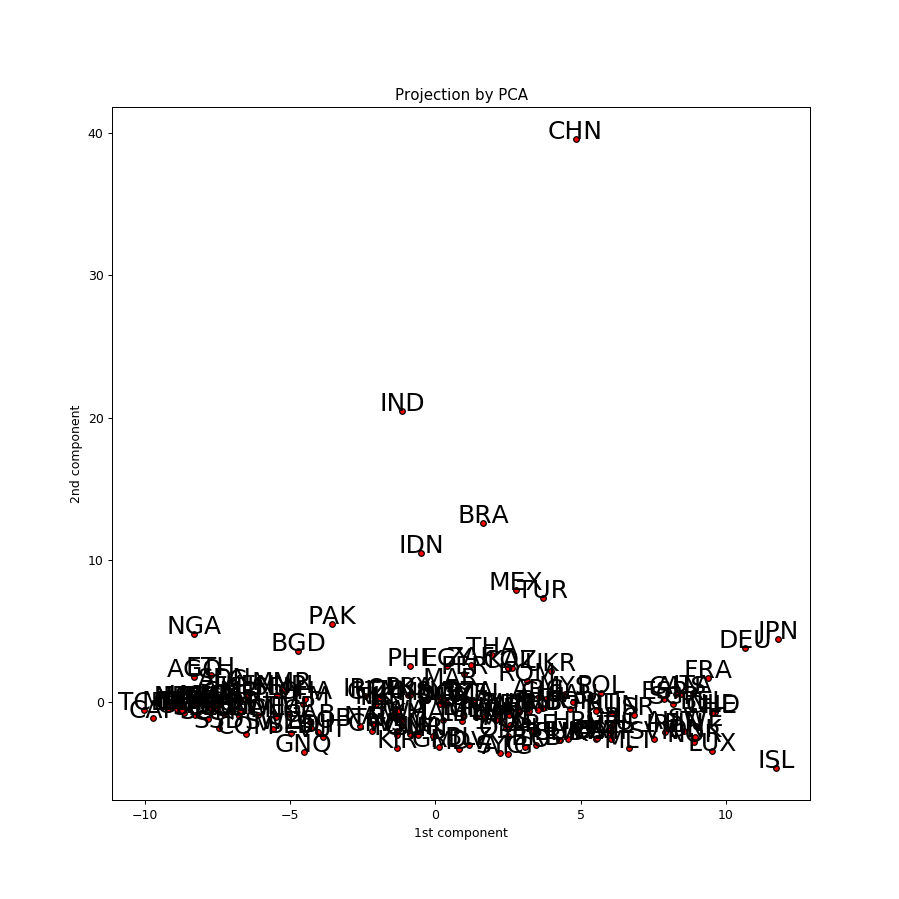

In [457]:
plt.figure(figsize=(10,10))

x = X_pca[:, 0]
y = X_pca[:, 1]

plt.scatter(x, y, c="red", s=20, edgecolor='k')

for i, country in enumerate(countries):
    plt.annotate(country, (x[i], y[i]), ha='center', size=20)

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

<IPython.core.display.Javascript object>


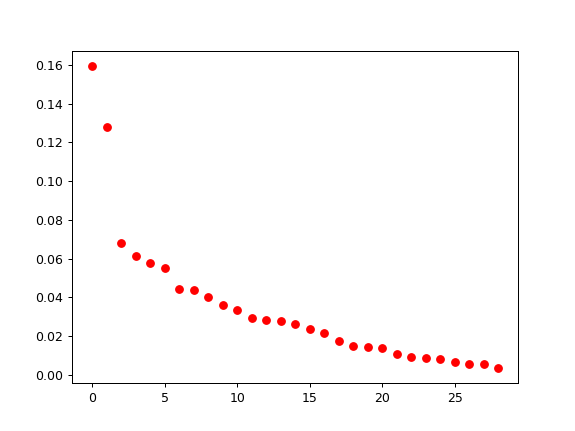

0.28747245986565123


In [501]:
variance = pca.explained_variance_ratio_
plt.plot(variance, 'ro')
plt.show()
print(sum(variance[0:2]))

In [485]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))

pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))

----------PC1-------------
Birth rate, crude (per 1,000 people):-0.15874366111002433
Pupil-teacher ratio, primary:-0.13989079036682767
Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population):-0.13564176809532963
Rural population (% of total population):-0.1315989637365838
Renewable energy consumption (% of total final energy consumption):-0.12074835008738939
Children with fever receiving antimalarial drugs (% of children under age 5 with fever):-0.1134825774046244
Repeaters, primary, total (% of total enrollment):-0.10951469488356948
Pupil-teacher ratio, secondary:-0.10938527087760669
Bribery incidence (% of firms experiencing at least one bribe payment request):-0.09967034664782051
Urban population growth (annual %):-0.09700373248637731
Employment in agriculture (% of total employment):-0.0945271175956743
Average working hours of children, study and work, ages 7-14 (hours per week):-0.08958174694222436
Currency composition of PPG debt, all other currencies (%):-0.087682314

In [486]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k):
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))

----------PC1-------------
SP_DYN_CBRT_IN:-0.15874366111002433
SE_PRM_ENRL_TC_ZS:-0.13989079036682767
SI_POV_2DAY:-0.13564176809532963
SP_RUR_TOTL_ZS:-0.1315989637365838
EG_FEC_RNEW_ZS:-0.12074835008738939
SH_MLR_TRET_ZS:-0.1134825774046244
SE_PRM_REPT_ZS:-0.10951469488356948
SE_SEC_ENRL_TC_ZS:-0.10938527087760669
IC_FRM_BRIB_ZS:-0.09967034664782051
SP_URB_GROW:-0.09700373248637731
SL_AGR_EMPL_ZS:-0.0945271175956743
SL_TLF_0714_SW_TM:-0.08958174694222436
DT_CUR_OTHC_ZS:-0.08768231440161293
BX_GRT_EXTA_CD_WD:-0.07774843578377973
SL_TLF_0714_WK_TM:-0.0738064978285385
--------------------------
SP_DYN_LE00_IN:0.1583650595037379
life_expectancy:0.15623492816090515
EG_NSF_ACCS_ZS:0.15467845378578887
EG_ELC_ACCS_RU_ZS:0.1528577916006638
EG_NSF_ACCS_RU_ZS:0.1513599473916321
EG_ELC_ACCS_ZS:0.15006126629423017
SH_STA_ACSN:0.1487224961947731
SH_XPD_PCAP_PP_KD:0.14253395870832694
SL_TLF_TERT_ZS:0.1424747168328563
SL_GDP_PCAP_EM_KD:0.14197496751435504
SE_SEC_ENRR:0.1394064196420046
SE_TER_ENRR:0.1

## __PCA analysis using less indicators from each sector__

In [502]:
year = 2010
data_from_year = df[df['year'] == year]
countries = list(data_from_year['country_code'])

# data contatins only columns with indicators
data = data_from_year.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [503]:
indicators_list = list(data.columns)

sector_names = []
for entry in indicators_list:
    if entry.split('_')[0] not in sector_names:
        sector_names.append(entry.split('_')[0])

# quick fix life_expectancy param
for i, sector_name in enumerate(sector_names):
    if sector_name == 'life':
        sector_names[i] = 'life_expectancy'
        
print('There are %s sectors' %len(sector_names))

There are 32 sectors


In [504]:
from random import randrange

# now we need to select only one idicator from each sector
# list of column names selected for analysis
selected_indicators = []

for sector_name in sector_names:
    tmp_list = []
    for column_name in data.columns:
        # sector_name[:2] required for life_expectancy and gdp params only
        if column_name[:2] == sector_name[:2]:
            tmp_list.append(column_name)
    # rand one of column from tmp_list and add it to selected_indicators
    if len(tmp_list):
        selected_indicators.append(tmp_list[randrange(len(tmp_list))])

In [505]:
assert len(selected_indicators) == len(sector_names)

In [506]:
data = data[selected_indicators]

# replace NaN with mean values
# in data there should not be any NaN values...
data.fillna(data.mean(), inplace=True)

In [507]:
data 

,BN_GSR_GNFS_CD,BX_GRT_TECH_CD_WD,BM_GSR_MRCH_CD,FI_RES_TOTL_DT_ZS,DT_IXA_DPPG_CD,NY_GDP_PCAP_PP_CD,SE_PRM_ENRR,AG_PRD_FOOD_XD,EA_PRD_AGRI_KD,EN_POP_EL5M_ZS,...,IT_MLT_MAIN,GB_XPD_RSDV_GD_ZS,SI_POV_2DAY,IC_TAX_TOTL_CP_ZS,MS_MIL_TOTL_P1,GC_DOD_TOTL_CN,SL_AGR_0714_ZS,SM_POP_TOTL_ZS,life_expectancy,gdp
29,1.268320e+09,101779250.0,1.066728e+10,98.675716,1.404155e+08,21098.572290,98.449478,115.45,8984.838129,NaN,...,482211.0,1.582420,0.000000,48.800000,5750.000000,1.309200e+09,69.429091,13.703900,75.6,14638.648200
72,4.784840e+09,101779250.0,1.119043e+10,98.675716,1.404155e+08,39423.651289,105.752914,115.43,10611.530462,NaN,...,228000.0,0.038580,24.462553,13.500000,19460.000000,2.930118e+09,69.429091,25.005807,76.1,2722.138900
98,3.846233e+10,101779250.0,6.212426e+10,98.675716,1.404155e+08,43219.753713,105.700394,100.01,11699.132320,NaN,...,2077978.0,1.618580,24.462553,25.300000,10460.000000,1.380470e+11,69.429091,19.706128,86.0,48538.587760
124,-1.682949e+08,17730000.0,1.819106e+08,68.029111,1.100000e+04,4852.021362,108.027702,136.75,3784.653548,NaN,...,31000.0,0.972538,24.462553,26.200000,141958.986395,2.400681e+13,69.429091,0.815800,72.8,3547.599750
126,1.385660e+10,69810000.0,5.537206e+10,98.675716,1.404155e+08,18256.196642,102.234619,109.77,5829.224009,NaN,...,3457506.0,0.330990,24.462553,24.500000,103771.000000,2.400681e+13,69.429091,1.883021,79.1,1286.177640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,4.907556e+09,20350000.0,6.958072e+10,98.675716,7.760000e+05,9828.718148,105.752914,116.56,10611.530462,NaN,...,520002.0,0.972538,24.462553,45.142958,22000.000000,2.400681e+13,69.429091,4.119401,65.8,4439.230000
2503,-1.490212e+09,11800000.0,1.968701e+09,137.648351,0.000000e+00,2187.396030,110.469383,111.20,338.334499,NaN,...,38612.0,0.972538,77.280000,14.200000,2000.000000,2.400681e+13,69.429091,0.314734,51.1,1173.262120
2507,-7.215805e+07,16110000.0,3.738894e+08,32.350238,5.050000e+05,2644.628229,105.752914,118.55,10611.530462,NaN,...,18474.0,0.972538,24.462553,38.100000,12950.000000,2.400681e+13,69.429091,13.739375,61.3,1325.997240
2542,-1.899623e+08,39000000.0,1.560025e+09,130.248981,1.070000e+05,7630.988846,105.752914,81.93,2522.171905,NaN,...,129845.0,0.972538,24.462553,39.300000,3500.000000,2.400681e+13,69.429091,2.155120,69.1,3651.966784


In [508]:
# standarize data
# have no idea why it warn about NaN values if data do not have any NaN...
data_scaled = preprocessing.scale(data)

/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:158: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
/usr/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:166: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:183: RuntimeWarning: Mean of empty slice
  mean_2 = np.nanmean(Xr, axis=0)
/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encounter

In [509]:
data_scaled.shape

(159, 32)

In [510]:
# delete columns containing nasns
columns_to_delete = []
for i, entry in enumerate(data_scaled.std(axis=0)):
    if np.isnan(entry):
        columns_to_delete.append(i)

data_scaled = np.delete(data_scaled, columns_to_delete, axis=1)
data_scaled.shape

indicators = list(data.columns)

for index in columns_to_delete:
    del indicators[index]

# it should be correct
len(indicators)

30

In [511]:
# if this failes, something is wrong or above cells were run too many times
assert len(indicators) == data_scaled.shape[1]

In [512]:
from sklearn.decomposition import PCA

In [513]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)
X_pca.shape

(159, 30)

<IPython.core.display.Javascript object>


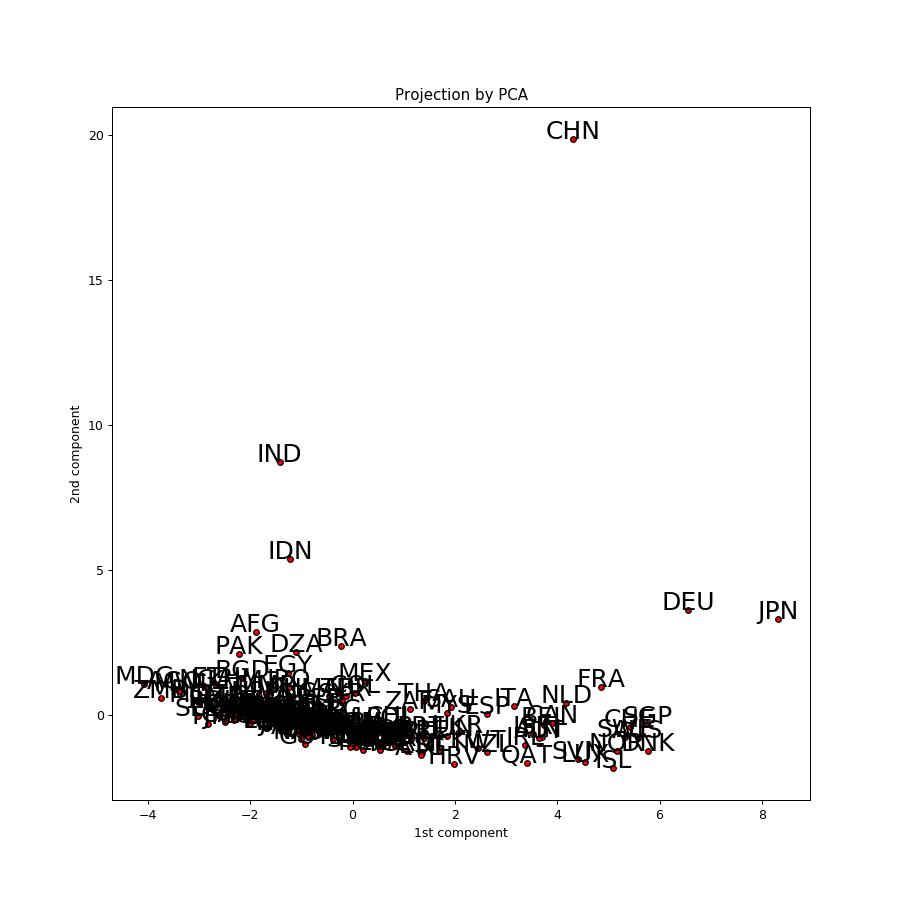

In [514]:
plt.figure(figsize=(10,10))

x = X_pca[:, 0]
y = X_pca[:, 1]

plt.scatter(x, y, c="red", s=20, edgecolor='k')

for i, country in enumerate(countries):
    plt.annotate(country, (x[i], y[i]), ha='center', size=20)

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

<IPython.core.display.Javascript object>


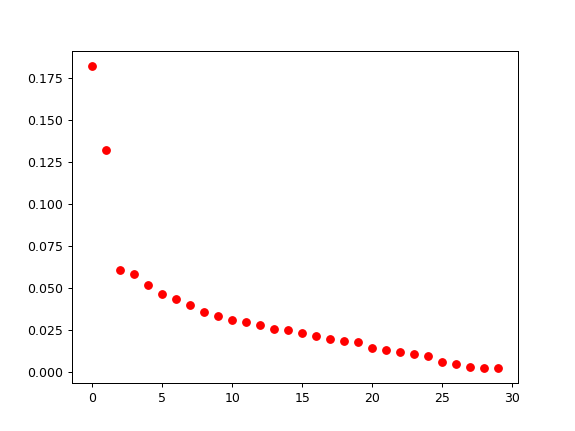

0.3144096953199571


In [517]:
variance = pca.explained_variance_ratio_
plt.plot(variance, 'ro')
plt.show()
print(sum(variance[0:2]))

In [518]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))

pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))

----------PC1-------------
Food production index (2004-2006 = 100):-0.210025486822351
Inflation, consumer prices (annual %):-0.18373338427053962
Risk premium on lending (lending rate minus treasury bill rate, %):-0.13933009017407827
Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population):-0.12485570399083509
Total tax rate (% of commercial profits):-0.09481216687988465
School enrollment, primary (% gross):-0.07997459752084615
Real effective exchange rate index (2010 = 100):-0.06145593493919067
Child employment in manufacturing (% of economically active children ages 7-14):-0.025659939393339805
Interest arrears, long-term DOD (US$):-0.006201946835908981
Net foreign assets (current LCU):-0.0007761664087323553
Rural population:0.0017596272518454331
Total reserves (% of total external debt):0.012897572327657598
Technical cooperation grants (BoP, current US$):0.025525329082006776
Military expenditure (% of GDP):0.027858457336299908
Central government debt, total (current LCU):0.

In [123]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k):
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))

----------PC1-------------
EN_POP_EL5M_ZS:-0.3426277392113062
SE_XPD_PRIM_ZS:-0.26341052877912985
SI_DST_10TH_10:-0.19127895734658604
ER_H2O_FWIN_ZS:-0.13182351656789
IC_PRP_PROC:-0.12799058332113059
FR_INR_DPST:-0.11783222884807927
BX_GSR_TRVL_ZS:-0.08663577269904499
SL_UEM_TOTL_NE_ZS:-0.0803395015260348
PX_REX_REER:-0.04158269445798279
FM_AST_PRVT_ZG_M3:-0.04114458850359129
FP_CPI_TOTL:-0.04105526191107871
SH_MLR_TRET_ZS:-0.03895866535125586
NY_GDP_PCAP_KN:-0.0064708503391699545
MS_MIL_XPND_GD_ZS:0.007626958939800255
FI_RES_TOTL_DT_ZS:0.03585248849363378
--------------------------
life_expectancy:0.36127083664485027
EG_NSF_ACCS_ZS:0.3470343206710064
EA_PRD_AGRI_KD:0.32111354651819224
gdp:0.2808207554915313
GB_XPD_RSDV_GD_ZS:0.2727660593984218
SM_POP_TOTL_ZS:0.23905445289697153
FD_AST_PRVT_GD_ZS:0.2371200756783386
CM_MKT_TRAD_GD_ZS:0.18331214258373874
IT_MLT_MAIN:0.11852029094060945
DT_DOD_DSTC_CD:0.1074893957039312
BN_CAB_XOKA_GD_ZS:0.10342893404443257
GC_DOD_TOTL_GD_ZS:0.09075296313

[[ 0.10342893 -0.08663577  0.06991943  0.03585249  0.1074894  -0.00647085
  -0.26341053  0.32111355 -0.34262774  0.34703432 -0.13182352  0.05739692
  -0.04114459  0.23712008  0.18331214 -0.04105526 -0.04158269 -0.11783223
  -0.03895867  0.11852029  0.27276606 -0.19127896 -0.12799058  0.00762696
   0.09075296 -0.0803395   0.23905445  0.36127084  0.28082076]
 [ 0.05838905 -0.04444208 -0.12829034  0.10912734  0.54039856  0.05588307
   0.06869331 -0.09501821  0.10294663 -0.14046449 -0.13546279  0.13454363
   0.03535277 -0.05616546  0.36858073  0.01719989  0.16086316 -0.07983578
  -0.03224336  0.56433927  0.08098771  0.13260442  0.06427623 -0.02365523
   0.08034315 -0.15944347 -0.16291899 -0.08001878 -0.06774465]]


<IPython.core.display.Javascript object>


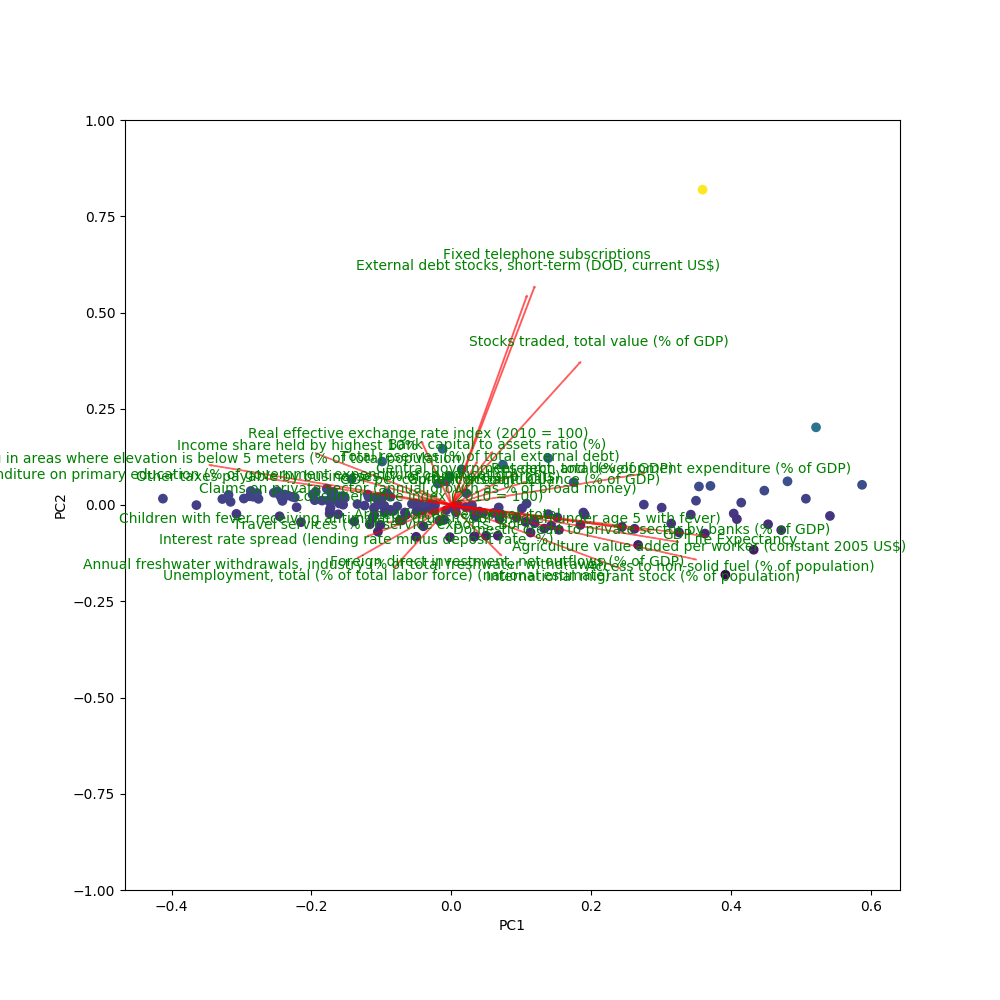

In [124]:
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(10,10))
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

print(pca.components_[0:2, :])

indicators_full_name_list = []
for ind in indicators:
    indicators_full_name_list.append(translate_symbol_to_name(ind))

myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]), indicators_full_name_list)
axes = plt.gca()
axes.set_ylim([-1.0,1.0])
plt.show()

## __Unemployment analysis__

In [538]:
df2=pd.read_csv('unemployment.csv')
df2.head(5)

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [539]:
non_country_list=['Arab World','Central Europe and the Baltics','Caribbean small states','East Asia & Pacific (excluding high income)',
                 'Early-demographic dividend', 'East Asia & Pacific','Europe & Central Asia (excluding high income)',
                 'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
                 'Heavily indebted poor countries (HIPC)','IBRD only', 'IDA & IBRD total', 'IDA total','IDA blend','IDA only',
                 'Latin America & Caribbean (excluding high income)','Latin America & Caribbean','Least developed countries: UN classification', 
                 'Low income','Lower middle income', 'Low & middle income','Late-demographic dividend','Middle East & North Africa',
                 'Middle income','Middle East & North Africa (excluding high income)','North America','OECD members','Other small states',
                 'Pre-demographic dividend','Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)',
                 'Sub-Saharan Africa','Small states','East Asia & Pacific (IDA & IBRD countries)',
                 'Europe & Central Asia (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World']

In [540]:
df_non_country=df2[df2['Country Name'].isin(non_country_list)]
df_non_country

,Country Name,Country Code,2010,2011,2012,2013,2014
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
29,Central Europe and the Baltics,CEB,24.558510,25.480771,26.322471,26.775459,24.326735
40,Caribbean small states,CSS,25.004050,23.858827,25.977574,26.477460,24.596775
48,East Asia & Pacific (excluding high income),EAP,11.001822,10.687960,10.891421,11.511484,11.790579
49,Early-demographic dividend,EAR,14.250746,14.180419,14.328332,14.223181,14.350504
50,East Asia & Pacific,EAS,10.925130,10.586137,10.754695,11.296945,11.570405
51,Europe & Central Asia (excluding high income),ECA,19.224340,18.330847,17.841042,17.295016,17.249284
52,Europe & Central Asia,ECS,20.433000,20.229570,21.103942,21.183220,20.889980
55,Euro area,EMU,22.387131,22.914578,25.808095,26.938890,27.583946
60,European Union,EUU,22.158531,22.793596,25.032586,25.717269,25.116139


In [541]:
df_country=df2[~df2['Country Name'].isin(non_country_list)]
df_country

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999
...,...,...,...,...,...,...,...
214,"Yemen, Rep.",YEM,30.299999,30.000000,30.200001,30.200001,29.900000
215,South Africa,ZAF,50.799999,50.099998,52.200001,51.400002,52.599998
216,"Congo, Dem. Rep.",COD,12.300000,12.300000,12.300000,12.200000,11.900000
217,Zambia,ZMB,26.400000,26.600000,26.600000,25.500000,25.100000


<IPython.core.display.Javascript object>


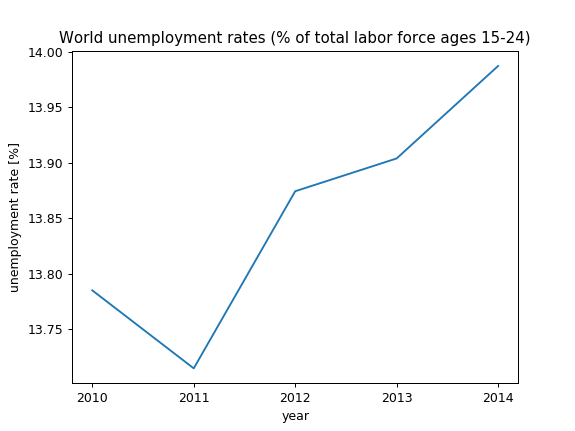

In [542]:
df_world = df2[df2['Country Name'] == 'World']

x = list(df_world.columns[-5:])
y = list(df_world.iloc[0,-5:])

plt.title("World unemployment rates (% of total labor force ages 15-24)")
plt.plot(x,y)
plt.ylabel("unemployment rate [%]")
plt.xlabel("year")
plt.show()

<IPython.core.display.Javascript object>


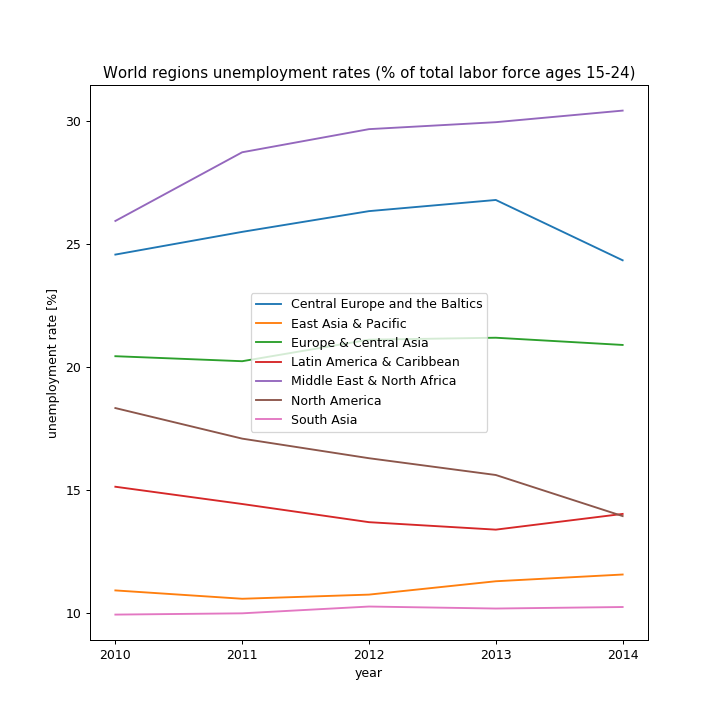

In [543]:
df_region = df2[
    (df2['Country Name'] == 'Europe & Central Asia') | 
    (df2['Country Name'] == 'North America') |
    (df2['Country Name'] == 'Latin America & Caribbean') |
    (df2['Country Name'] == 'South Asia') |
    (df2['Country Name'] == 'Middle East & North Africa') |
    (df2['Country Name'] == 'East Asia & Pacific') |
    (df2['Country Name'] == 'Central Europe and the Baltics') |
    (df2['Country Name'] == 'East Asia & Pacific')
]

x = list(df_region.columns[-5:])
plt.figure(figsize=(8,8))
plt.plot(x, list(df_region.iloc[0, -5:]))
plt.plot(x, list(df_region.iloc[1, -5:]))
plt.plot(x, list(df_region.iloc[2, -5:]))
plt.plot(x, list(df_region.iloc[3, -5:]))
plt.plot(x, list(df_region.iloc[4, -5:]))
plt.plot(x, list(df_region.iloc[5, -5:]))
plt.plot(x, list(df_region.iloc[6, -5:]))
plt.title("World regions unemployment rates (% of total labor force ages 15-24)")

plt.legend(list(df_region['Country Name'].unique()))
plt.ylabel("unemployment rate [%]")
plt.xlabel("year")
plt.show()

In [544]:
df = pd.read_csv('data_extended.csv')

# replace in column names all '.' to '_', it would simplify using pandas data frames
df.columns = df.columns.str.replace('.', '_')

unemployment_ind_codes = ['SL_UEM_LTRM_ZS', 'SL_UEM_PRIM_ZS', 'SL_UEM_SECO_ZS', 'SL_UEM_TERT_ZS' , 'SL_UEM_TOTL_NE_ZS']
unempl_df = df[['country_code', 'year', *unemployment_ind_codes, 'gdp']]
unempl_df = unempl_df[(unempl_df['year'] == 2010) | 
                      (unempl_df['year'] == 2011) |
                      (unempl_df['year'] == 2012) |
                      (unempl_df['year'] == 2013) | 
                      (unempl_df['year'] == 2014) 
                     ]
unempl_df

,country_code,year,SL_UEM_LTRM_ZS,SL_UEM_PRIM_ZS,SL_UEM_SECO_ZS,SL_UEM_TERT_ZS,SL_UEM_TOTL_NE_ZS,gdp
0,BEL,2014,49.900002,37.099998,40.200001,22.700001,8.5,47439.396840
6,ESP,2011,41.599998,55.099998,23.799999,20.100000,21.4,31834.218160
7,ETH,2014,NaN,NaN,NaN,NaN,NaN,571.162276
9,LTU,2011,52.099998,13.600000,71.599998,14.600000,15.4,14357.736790
22,NGA,2011,NaN,NaN,NaN,NaN,23.9,2527.942300
...,...,...,...,...,...,...,...,...
2529,ISL,2012,25.400000,54.799999,29.000000,14.900000,6.0,44333.851800
2537,TKM,2014,NaN,NaN,NaN,NaN,NaN,7962.365824
2542,FJI,2010,NaN,NaN,NaN,NaN,8.9,3651.966784
2546,SLV,2010,NaN,47.700001,31.700001,9.800000,7.0,3474.392445


In [546]:
# merged_df = pd.DataFrame(columns = ['Country', 'GDP_2011', 'GDP_2014', dGDP, 'Unemployment_2011', 'Unemployment_2014', dUnemployment]) 
l = []
for country in countries:
    # check if country in 2nd table
    if country in list(df2['Country Code'].unique()):
        gdp_val2014 = unempl_df[(unempl_df['year'] == 2014) & (unempl_df['country_code'] == country)]['gdp']
        gdp_val2011 = unempl_df[(unempl_df['year'] == 2010) & (unempl_df['country_code'] == country)]['gdp']
        print(gdp_val2014.item(), gdp_val2011.item())
        
        unemp_val2014 = df2[df2['Country Code'] == country]['2014']
        unemp_val2011 = df2[df2['Country Code'] == country]['2011']
        if ~np.isnan(gdp_val2014.item()) \
            and ~np.isnan(gdp_val2011.item()) \
            and ~np.isnan(unemp_val2014.item()) \
            and ~np.isnan(unemp_val2011.item()):
            
#             print(country, int(gdp_val2014), int(unemp_val2014))
            tmp = {'Country': country, 'GDP_2011': gdp_val2011.item(), 'GDP_2014': gdp_val2014.item(), 'dGDP': gdp_val2014.item() - gdp_val2011.item(),'Unemployment_2011':  unemp_val2011.item(), 'Unemployment_2014': unemp_val2014.item(), 'dUnemployment': unemp_val2014.item() - unemp_val2011.item()}
            l.append(tmp)
            
            
merged_df = pd.DataFrame(l)

19941.455319999997 14638.6482
24983.3792 2722.1389
5553.32623 48538.58776
14817.37778 1286.17764
3491.595887 3113.48635
52157.4687 5338.25483
377.132274 446.4434494
29.652621999999997 1272.44825
417.89142999999996 nan
43.823209999999996 326.28121200000004
192.59733 17136.44568
1226.6173099999999 11224.1548
11183.96191 971.3569869999999
2277.53613 22538.6548
4429.6575 2964.47734
125.998515 896.5697341
15725.1374 11326.21947
5918.19898 5276.25591
62.131848899999994 487.9238913
114.45918999999999 738.3475227000001
78.4394757 45.128417999999996
2242.711912 1932.85829
76.2386977 592.1835216
12593.7374 7937.2599310000005
561.997387 438.7513346
3896.21151 4457.67639
52473.113560000005 41676.44527
nan 1212.56217
1452.27766 8959.581415999999
85814.58857 74276.71842
14341.675 12599.52486
19325.242830000003 16683.945780000002
1738.8822 1463.213573
547.8517 4463.394675
1573.11889 1345.77153
184.56543 757.6717572000001
544.43376 47447.4762
127.47462 713.63562
4852.223666 4344.15177
1441.1417 1182.8

In [547]:
merged_df = merged_df.sort_values('dGDP')
merged_df

,Country,GDP_2011,GDP_2014,dGDP,Unemployment_2011,Unemployment_2014,dUnemployment
100,NOR,87646.75346,975.49856,-86671.25490,8.700000,8.400000,-0.300000
34,CAN,47447.47620,544.43376,-46903.04244,14.100000,13.400000,-0.700001
2,IRL,48538.58776,5553.32623,-42985.26153,29.100000,25.799999,-3.300001
53,DEU,41785.55691,4792.65288,-36992.90403,8.400000,7.600000,-0.800000
114,NZL,33691.34837,4453.24673,-29238.10164,17.200001,14.600000,-2.600000
...,...,...,...,...,...,...,...
125,FIN,4622.41516,49914.61864,45292.20348,18.900000,19.200001,0.300001
5,NLD,5338.25483,52157.46870,46819.21387,7.500000,11.100000,3.600000
46,DNK,5841.41122,62425.53920,56584.12798,14.300000,12.400000,-1.900001
92,QAT,736.22784,86852.71190,86116.48406,1.700000,1.300000,-0.400000


<IPython.core.display.Javascript object>


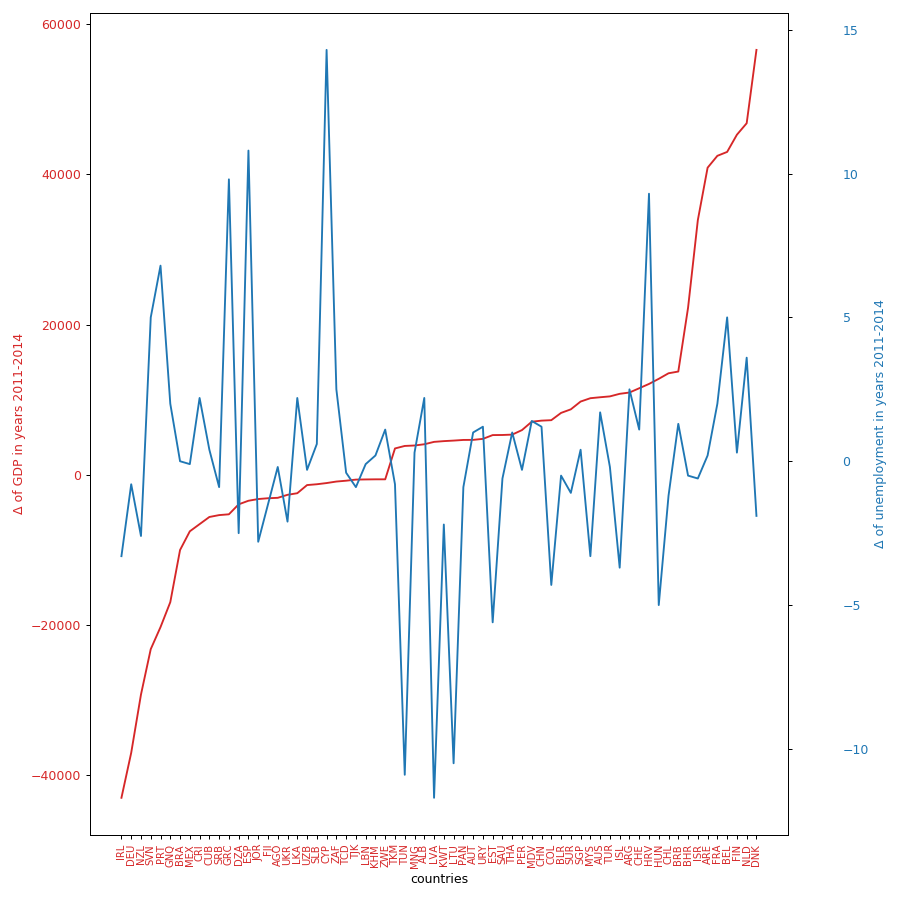

In [554]:
x = list(merged_df['Country'])[2:30] + list(merged_df['Country'])[100:-2]

y_gdp = list(merged_df['dGDP'])[2:30] + list(merged_df['dGDP'])[100:-2]
y_unemployment = list(merged_df['dUnemployment'])[2:30] + list(merged_df['dUnemployment'])[100:-2]


fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:red'
ax1.set_xlabel('countries')
ax1.set_ylabel('Δ of GDP in years 2011-2014', color=color)

ax1.plot(x, y_gdp, color=color)
ax1.tick_params(axis='y', labelcolor=color, )
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Δ of unemployment in years 2011-2014', color=color)
ax2.plot(x, y_unemployment, color=color)
ax2.tick_params(axis='y', labelcolor=color, pad=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [611]:
# --
# countries = df["countryCode"].unique()

# for co in countries:
#     df.loc[df.countryCode == co] =  df[df.countryCode == co].interpolate(method='linear',
#                                                                limit_direction = "both")
# df = df.fillna(value=0)
# df
# --
merged_df.shape

(140, 7)

In [567]:
sorted_merged = merged_df[['Country','GDP_2014']].sort_values('GDP_2014')

In [666]:
countries_to_analysis = sorted_merged['Country']
bottom = list(countries_to_analysis.head(20))
top = list(countries_to_analysis.tail(20))

In [667]:
unempl_df

,country_code,year,SL_UEM_LTRM_ZS,SL_UEM_PRIM_ZS,SL_UEM_SECO_ZS,SL_UEM_TERT_ZS,SL_UEM_TOTL_NE_ZS,gdp
0,BEL,2014,49.900002,37.099998,40.200001,22.700001,8.5,47439.396840
6,ESP,2011,41.599998,55.099998,23.799999,20.100000,21.4,31834.218160
7,ETH,2014,NaN,NaN,NaN,NaN,NaN,571.162276
9,LTU,2011,52.099998,13.600000,71.599998,14.600000,15.4,14357.736790
22,NGA,2011,NaN,NaN,NaN,NaN,23.9,2527.942300
...,...,...,...,...,...,...,...,...
2529,ISL,2012,25.400000,54.799999,29.000000,14.900000,6.0,44333.851800
2537,TKM,2014,NaN,NaN,NaN,NaN,NaN,7962.365824
2542,FJI,2010,NaN,NaN,NaN,NaN,8.9,3651.966784
2546,SLV,2010,NaN,47.700001,31.700001,9.800000,7.0,3474.392445


In [668]:
translate_symbol_to_name('SL_UEM_TERT_ZS')

'Unemployment with tertiary education (% of total unemployment)'

In [669]:
top_primary_ed = 0
counter = 0
for country in top:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_PRIM_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        top_primary_ed += tmp.item()

top_mean_prim = top_primary_ed / counter


top_sec_ed = 0
counter = 0
for country in top:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_SECO_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        top_sec_ed += tmp.item()

top_mean_sec = top_sec_ed / counter
        

top_terr_ed = 0
counter = 0    
for country in top:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_TERT_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        top_terr_ed += tmp.item()

top_mean_terr = top_terr_ed / counter

In [670]:
bot_primary_ed = 0
counter = 0
for country in bottom:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_PRIM_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        bot_primary_ed += tmp.item()

bot_mean_prim = bot_primary_ed / counter

bot_sec_ed = 0
counter = 0
for country in bottom:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_SECO_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        bot_sec_ed += tmp.item()

bot_mean_sec = bot_sec_ed / counter


bot_terr_ed = 0
counter = 0    
for country in bottom:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_TERT_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        bot_terr_ed += tmp.item()

bot_mean_terr = bot_terr_ed / counter

In [671]:
print(bot_mean_prim)
print(bot_mean_terr)
print(bot_mean_sec)
print(top_mean_sec)
print(top_mean_prim)
print(top_mean_terr)

18.6000003814697
19.8999996185303
61.5999984741211
44.27500041325888
31.608333110809323
23.04166698455812


<IPython.core.display.Javascript object>


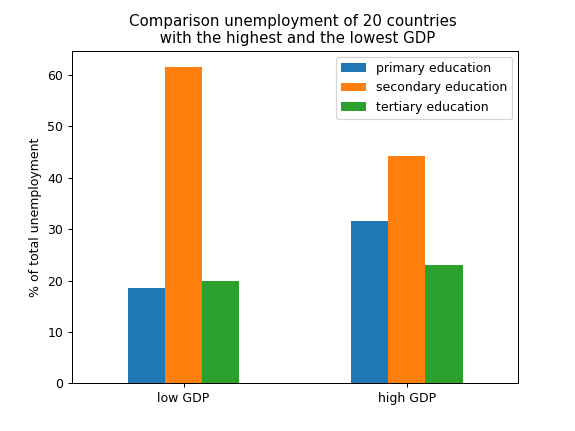

In [673]:
df_rearanged = pd.DataFrame({
    'primary education' : [bot_mean_prim, top_mean_prim],
    'secondary education' : [bot_mean_sec, top_mean_sec],
    'tertiary education' : [bot_mean_terr, top_mean_terr]
    },index = ['low GDP', 'high GDP']
)
df_rearanged.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Comparison unemployment of 20 countries \n with the highest and the lowest GDP')
plt.ylabel('% of total unemployment')
plt.show()

## __Birth rate__

In [16]:
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df = pd.read_csv('data_extended.csv')

# replace in column names all '.' to '_', it would simplify using pandas data frames
df.columns = df.columns.str.replace('.', '_')

countries = df["country_code"].unique()

for co in countries:
    df.loc[df.country_code == co] =  df[df.country_code == co].interpolate(method='linear',
                                                               limit_direction = "both")
df = df.fillna(value=0)
df

In [11]:
df['year'].unique()


array([2014, 2000, 2006, 2003, 2007, 2011, 2002, 2001, 2015, 2008, 2012,
       2009, 2010, 2004, 2005, 2013])

In [13]:
df = df[['country_code', 'year', 'gdp', 'SP_DYN_LE00_IN', 'SP_DYN_CBRT_IN', 'SP_DYN_IMRT_IN']]

In [14]:
df

,country_code,year,gdp,SP_DYN_LE00_IN,SP_DYN_CBRT_IN,SP_DYN_IMRT_IN
0,BEL,2014,47439.396840,77.973171,11.200,3.4
1,BLR,2000,1276.288340,68.912195,9.400,11.4
2,BRB,2006,15646.559100,74.193122,12.862,14.9
3,CRI,2003,4167.714170,77.840463,17.759,9.5
4,DEU,2003,3359.952150,78.380488,8.600,4.1
...,...,...,...,...,...,...
2545,PRY,2001,1417.265820,70.339854,26.291,26.9
2546,SLV,2010,3474.392445,71.670610,18.223,17.1
2547,TJK,2012,954.725253,69.166976,30.826,42.1
2548,UKR,2008,3891.378230,68.251463,11.000,11.1


In [15]:
df = df[(df['year'] == 2000) | (df['year'] == 2015)]

In [16]:
df

,country_code,year,gdp,SP_DYN_LE00_IN,SP_DYN_CBRT_IN,SP_DYN_IMRT_IN
1,BLR,2000,1276.288340,68.912195,9.400,11.4
13,SGP,2000,23792.677000,77.951220,11.800,3.1
14,SLV,2015,4127.117750,68.717049,24.083,14.4
15,TCD,2015,777.248751,49.862073,47.240,85.0
18,EST,2015,1774.929100,75.429268,11.900,2.3
...,...,...,...,...,...,...
2513,MNE,2015,6461.192554,74.063988,12.508,4.3
2514,NLD,2000,25921.127940,77.987805,13.000,5.1
2520,IRQ,2000,4521.324700,70.829927,35.882,35.8
2539,BFA,2015,615.592225,50.783220,46.032,60.9


In [17]:
df[(df['year'] == 2015) & (df['country_code'] == 'AUS')]

,country_code,year,gdp,SP_DYN_LE00_IN,SP_DYN_CBRT_IN,SP_DYN_IMRT_IN
2270,AUS,2015,56554.3876,81.395122,14.0,3.0


In [19]:
# drop all NaN rows
df = df[(df['gdp'].notna()) & (df['SP_DYN_LE00_IN'].notna()) & (df['SP_DYN_CBRT_IN'].notna()) & (df['SP_DYN_IMRT_IN'].notna())]
df

,country_code,year,gdp,SP_DYN_LE00_IN,SP_DYN_CBRT_IN,SP_DYN_IMRT_IN
1,BLR,2000,1276.288340,68.912195,9.400,11.4
13,SGP,2000,23792.677000,77.951220,11.800,3.1
14,SLV,2015,4127.117750,68.717049,24.083,14.4
15,TCD,2015,777.248751,49.862073,47.240,85.0
18,EST,2015,1774.929100,75.429268,11.900,2.3
...,...,...,...,...,...,...
2513,MNE,2015,6461.192554,74.063988,12.508,4.3
2514,NLD,2000,25921.127940,77.987805,13.000,5.1
2520,IRQ,2000,4521.324700,70.829927,35.882,35.8
2539,BFA,2015,615.592225,50.783220,46.032,60.9


In [20]:
countries = df['country_code'].unique()
countries

array(['BLR', 'SGP', 'SLV', 'TCD', 'EST', 'CRI', 'MMR', 'POL', 'ROM',
       'SEN', 'GRC', 'KWT', 'DEU', 'DNK', 'NOR', 'BWA', 'SAU', 'CHE',
       'PRT', 'DJI', 'HTI', 'COL', 'IRL', 'SLE', 'FRA', 'GIN', 'JAM',
       'NER', 'ETH', 'ZWE', 'TTO', 'ZMB', 'BTN', 'SDN', 'MWI', 'UZB',
       'FIN', 'COG', 'VUT', 'MDG', 'LTU', 'CMR', 'JOR', 'MAR', 'CAF',
       'KIR', 'NGA', 'MDV', 'NIC', 'TGO', 'AUT', 'BFA', 'BEL', 'CHL',
       'BLZ', 'GAB', 'HND', 'MOZ', 'SSD', 'URY', 'MLI', 'QAT', 'CPV',
       'ZAF', 'JPN', 'CYP', 'CAN', 'TJK', 'ITA', 'GEO', 'MNE', 'HRV',
       'ISL', 'UKR', 'DZA', 'GHA', 'ISR', 'PAN', 'DOM', 'KAZ', 'MEX',
       'MYS', 'MLT', 'THA', 'AGO', 'GNB', 'PNG', 'SVN', 'TON', 'LKA',
       'NZL', 'SYR', 'PRY', 'HUN', 'LUX', 'CUB', 'LBN', 'SWZ', 'IDN',
       'KHM', 'TMP', 'SWE', 'ARM', 'SYC', 'ESP', 'EGY', 'MRT', 'NPL',
       'PER', 'BDI', 'LSO', 'ARG', 'BEN', 'GUY', 'MUS', 'SOM', 'MNG',
       'OMN', 'SLB', 'IND', 'SUR', 'BRB', 'BGR', 'BRA', 'GRD', 'PAK',
       'LVA', 'ATG',

<IPython.core.display.Javascript object>


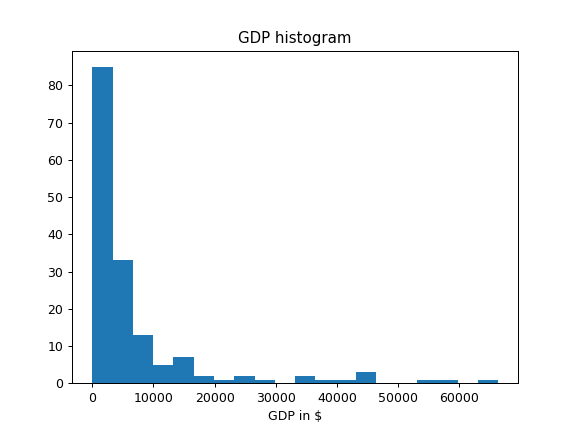

In [21]:
plt.hist(df[df['year'] == 2015]['gdp'], bins=20)
plt.title("GDP histogram")
plt.xlabel('GDP in $')
plt.show()

__Bins selected based on histogram:__

\> 40k <br>
25k - 40k <br>
15k - 25k <br>
5k - 15k <br>
0k - 5k <br>

In [22]:
b_40_plus = list(df[(df['year'] == 2015) & (df['gdp'] > 40000)]['country_code'])
b_25_40 = list(df[(df['year'] == 2015) & (df['gdp'] <= 40000)& (df['gdp'] > 25000)]['country_code'])
b_15_25 = list(df[(df['year'] == 2015) & (df['gdp'] <= 25000)& (df['gdp'] > 15000)]['country_code'])
b_5_15 = list(df[(df['year'] == 2015) & (df['gdp'] <= 15000)& (df['gdp'] > 5000)]['country_code'])
b_1_5 = list(df[(df['year'] == 2015) & (df['gdp'] <= 5000)& (df['gdp'] > 1000)]['country_code'])
b_1_less = list(df[(df['year'] == 2015) & (df['gdp'] <= 1000)]['country_code'])

In [23]:
print(random.choices(b_40_plus, k=5))
print(random.choices(b_25_40, k=5))
print(random.choices(b_15_25, k=5))
print(random.choices(b_5_15, k=5))
print(random.choices(b_1_5, k=5))
print(random.choices(b_1_less, k=5))

['QAT', 'AUS', 'NLD', 'AUS', 'QAT']
['ESP', 'KWT', 'ESP', 'JPN', 'ISR']
['URY', 'OMN', 'MLT', 'BHR', 'URY']
['HRV', 'GRD', 'HUN', 'NOR', 'DOM']
['LUX', 'PAK', 'CMR', 'GNQ', 'SYR']
['HTI', 'CIV', 'KAZ', 'GIN', 'GNB']


In [24]:
df[(df['country_code'].isin(b_40_plus)) & (df['year'] == 2015)]

,country_code,year,gdp,SP_DYN_LE00_IN,SP_DYN_CBRT_IN,SP_DYN_IMRT_IN
91,DEU,2015,41176.88158,80.289024,8.4000,3.1
428,AUT,2015,43665.94700,79.503659,9.3500,2.9
1453,QAT,2015,66346.52267,77.512963,15.4835,6.8
1666,SGP,2015,53629.73746,81.392683,10.1500,2.1
1713,CAN,2015,43315.74400,80.153671,11.0000,4.3
2045,NLD,2015,44292.88473,79.369512,11.9000,3.2
2270,AUS,2015,56554.38760,81.395122,14.0000,3.0


In [25]:
mean_40_plus_2000 = dict(np.mean(df[(df['country_code'].isin(b_40_plus)) & (df['year'] == 2000)]))
mean_40_plus_2015 = dict(np.mean(df[(df['country_code'].isin(b_40_plus)) & (df['year'] == 2015)]))

In [26]:
mean_40_plus_2000

{'year': 2000.0,
 'gdp': 22032.885822857144,
 'SP_DYN_LE00_IN': 78.13698954703834,
 'SP_DYN_CBRT_IN': 12.477571428571428,
 'SP_DYN_IMRT_IN': 5.442857142857143}

In [27]:
mean_40_plus_2015

{'year': 2015.0,
 'gdp': 49854.586434285724,
 'SP_DYN_LE00_IN': 79.94523344947736,
 'SP_DYN_CBRT_IN': 11.469071428571429,
 'SP_DYN_IMRT_IN': 3.6285714285714286}

In [28]:
mean_25_40_2000 = dict(np.mean(df[(df['country_code'].isin(b_25_40)) & (df['year'] == 2000)]))
mean_25_40_2015 = dict(np.mean(df[(df['country_code'].isin(b_25_40)) & (df['year'] == 2015)]))

In [29]:
mean_15_25_2000 = dict(np.mean(df[(df['country_code'].isin(b_15_25)) & (df['year'] == 2000)]))
mean_15_25_2015 = dict(np.mean(df[(df['country_code'].isin(b_15_25)) & (df['year'] == 2015)]))

In [30]:
mean_5_15_2000 = dict(np.mean(df[(df['country_code'].isin(b_5_15)) & (df['year'] == 2000)]))
mean_5_15_2015 = dict(np.mean(df[(df['country_code'].isin(b_5_15)) & (df['year'] == 2015)]))

In [31]:
mean_1_5_2000 = dict(np.mean(df[(df['country_code'].isin(b_1_5)) & (df['year'] == 2000)]))
mean_1_5_2015 = dict(np.mean(df[(df['country_code'].isin(b_1_5)) & (df['year'] == 2015)]))

In [32]:
mean_1_less_2000 = dict(np.mean(df[(df['country_code'].isin(b_1_less)) & (df['year'] == 2000)]))
mean_1_less_2015 = dict(np.mean(df[(df['country_code'].isin(b_1_less)) & (df['year'] == 2015)]))

In [33]:
mean_1_less_2015

{'year': 2015.0,
 'gdp': 431.28284317941177,
 'SP_DYN_LE00_IN': 61.620709787980246,
 'SP_DYN_CBRT_IN': 32.08264052287582,
 'SP_DYN_IMRT_IN': 40.562745098039215}

<IPython.core.display.Javascript object>


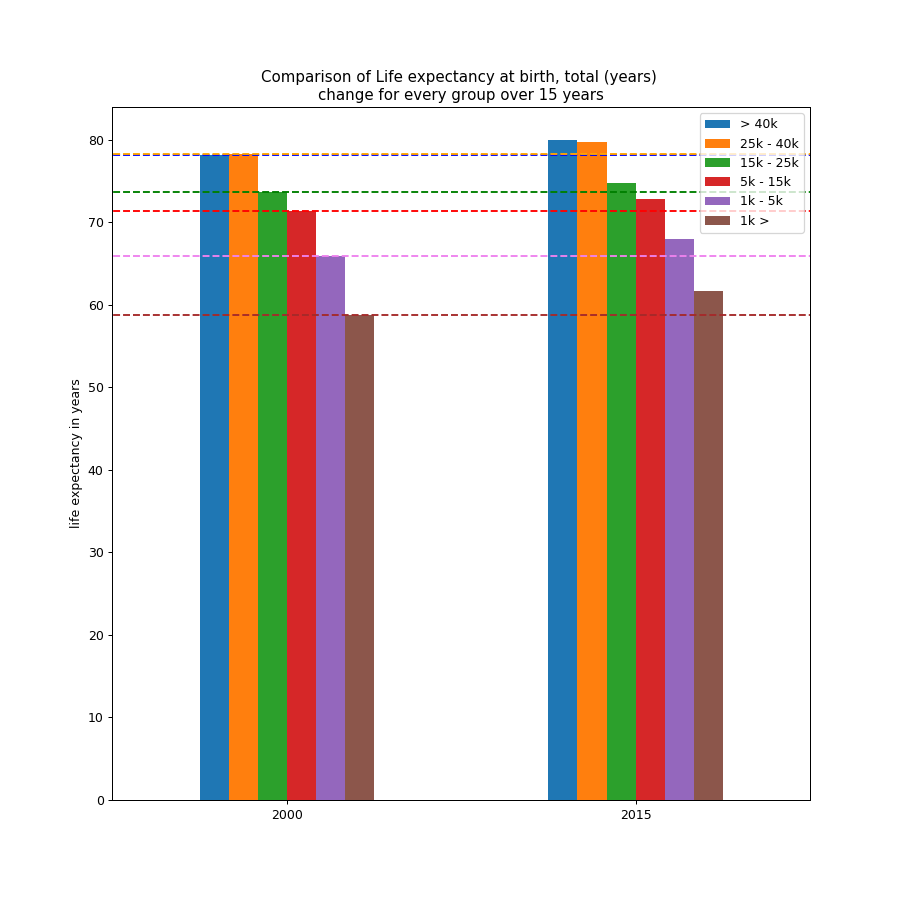

In [34]:
# plot result SP_DYN_LE00_IN

df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['SP_DYN_LE00_IN'], mean_40_plus_2015['SP_DYN_LE00_IN']],
    '25k - 40k' : [mean_25_40_2000['SP_DYN_LE00_IN'], mean_25_40_2015['SP_DYN_LE00_IN']],
    '15k - 25k' : [mean_15_25_2000['SP_DYN_LE00_IN'], mean_15_25_2015['SP_DYN_LE00_IN']],
    '5k - 15k' : [mean_5_15_2000['SP_DYN_LE00_IN'], mean_5_15_2015['SP_DYN_LE00_IN']],
    '1k - 5k' : [mean_1_5_2000['SP_DYN_LE00_IN'], mean_1_5_2015['SP_DYN_LE00_IN']],
    '1k >' : [mean_1_less_2000['SP_DYN_LE00_IN'], mean_1_less_2015['SP_DYN_LE00_IN']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')

plt.xticks(rotation=0)
plt.title('Comparison of %s \nchange for every group over 15 years' % translate_symbol_to_name('SP_DYN_LE00_IN'))
plt.ylabel('life expectancy in years')
plt.show()

<IPython.core.display.Javascript object>


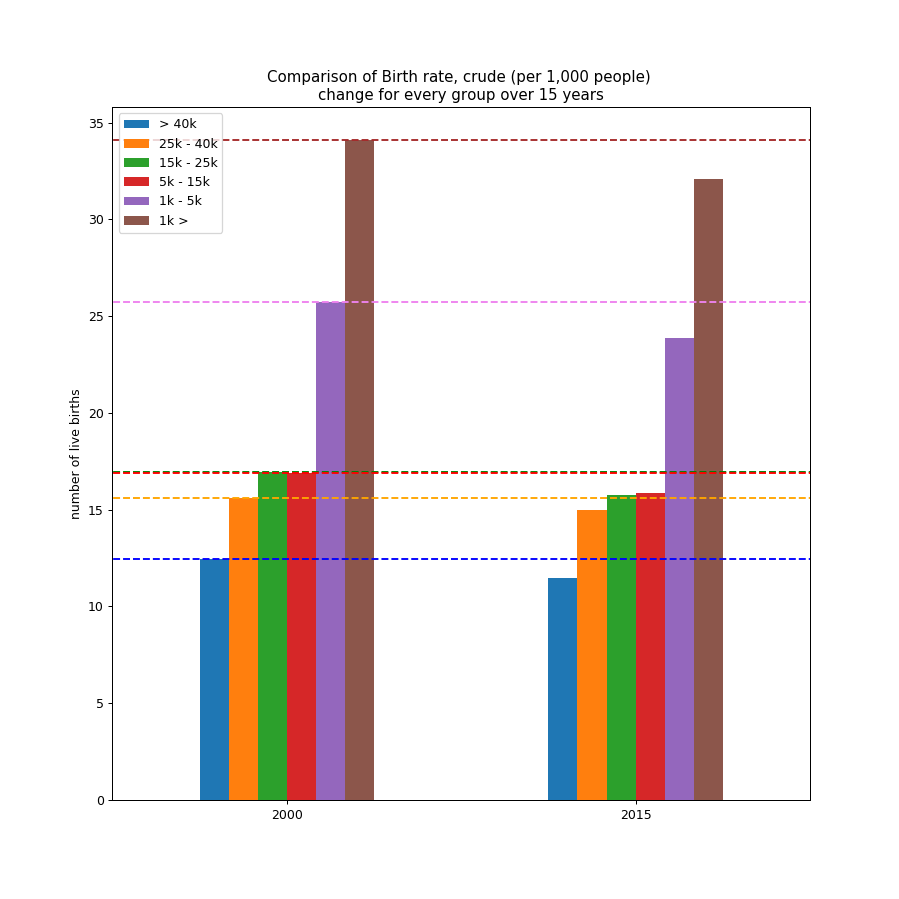

In [35]:
# plot result SP_DYN_CBRT_IN


df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['SP_DYN_CBRT_IN'], mean_40_plus_2015['SP_DYN_CBRT_IN']],
    '25k - 40k' : [mean_25_40_2000['SP_DYN_CBRT_IN'], mean_25_40_2015['SP_DYN_CBRT_IN']],
    '15k - 25k' : [mean_15_25_2000['SP_DYN_CBRT_IN'], mean_15_25_2015['SP_DYN_CBRT_IN']],
    '5k - 15k' : [mean_5_15_2000['SP_DYN_CBRT_IN'], mean_5_15_2015['SP_DYN_CBRT_IN']],
    '1k - 5k' : [mean_1_5_2000['SP_DYN_CBRT_IN'], mean_1_5_2015['SP_DYN_CBRT_IN']],
    '1k >' : [mean_1_less_2000['SP_DYN_CBRT_IN'], mean_1_less_2015['SP_DYN_CBRT_IN']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')


plt.xticks(rotation=0)
plt.title('Comparison of %s \nchange for every group over 15 years' % translate_symbol_to_name('SP_DYN_CBRT_IN'))
plt.ylabel('number of live births')
plt.show()

<IPython.core.display.Javascript object>


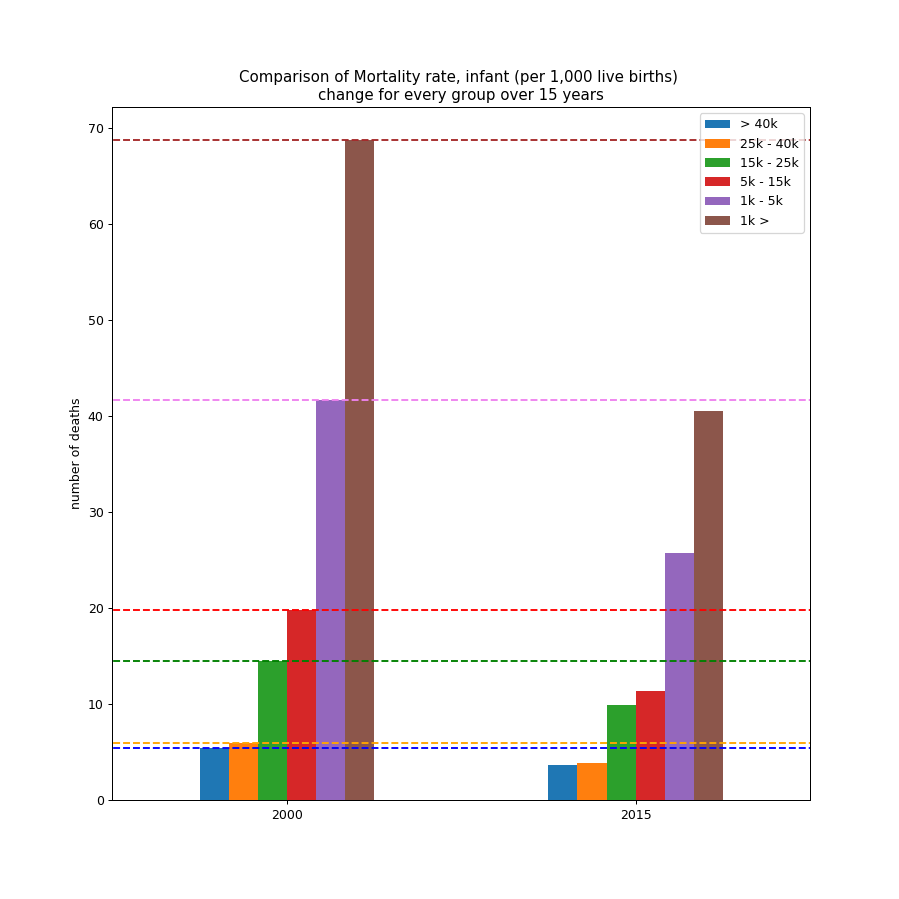

In [36]:
# plot result SH_DTH_IMRT


df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['SP_DYN_IMRT_IN'], mean_40_plus_2015['SP_DYN_IMRT_IN']],
    '25k - 40k' : [mean_25_40_2000['SP_DYN_IMRT_IN'], mean_25_40_2015['SP_DYN_IMRT_IN']],
    '15k - 25k' : [mean_15_25_2000['SP_DYN_IMRT_IN'], mean_15_25_2015['SP_DYN_IMRT_IN']],
    '5k - 15k' : [mean_5_15_2000['SP_DYN_IMRT_IN'], mean_5_15_2015['SP_DYN_IMRT_IN']],
    '1k - 5k' : [mean_1_5_2000['SP_DYN_IMRT_IN'], mean_1_5_2015['SP_DYN_IMRT_IN']],
    '1k >' : [mean_1_less_2000['SP_DYN_IMRT_IN'], mean_1_less_2015['SP_DYN_IMRT_IN']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')


plt.xticks(rotation=0)
plt.title('Comparison of %s \nchange for every group over 15 years' % translate_symbol_to_name('SP_DYN_IMRT_IN'))
plt.ylabel('number of deaths')
plt.show()